<a href="https://colab.research.google.com/github/u2k2/practiseML/blob/master/Happy_Bank_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from google.colab import files

In [ ]:
###Reading train data
upload = files.upload()
df_train = pd.read_csv(io.StringIO(upload['train_s3TEQDk.csv'].decode('utf-8')))

Saving train_s3TEQDk.csv to train_s3TEQDk.csv


In [ ]:
###Reading test data
upload = files.upload()
df_test = pd.read_csv(io.StringIO(upload['test_mSzZ8RL.csv'].decode('utf-8')))

Saving test_mSzZ8RL.csv to test_mSzZ8RL.csv


In [ ]:
##Taking deep copy of train and test data
df_copy = df_train.copy(deep = True)
df_copy_test = df_test.copy(deep = True)

In [ ]:
###Check initial few rows of train dataset

df_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [ ]:
### Dataset shape
print("Number of rows in the dataset is",df_train.shape[0])
print("Number of rows in the dataset is",df_test.shape[0])

Number of rows in the dataset is 245725
Number of rows in the dataset is 105312


In [ ]:
###Checking null values in train dataset
df_train.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [ ]:
##Checking null values in test data
df_test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [ ]:
##Number of unique values in each column for training data set
df_train.apply(lambda x: x.nunique())

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

In [ ]:
##Checking data type of each column
df_train.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [ ]:
## Segregating data frame in different data type columns
df_num = df_train.select_dtypes(exclude = 'object')
df_obj = df_train.select_dtypes(include = 'object')

In [ ]:
## Value count suggest that data set is imbalanced
df_copy['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

Exploratory data analysis on training data

Bivariate analysis

In [ ]:
###Function to plot countplot 

def plt_diag(data, a, b):
  plt.figure(figsize = (12,6))
  return sns.countplot (data=data,x = a,hue = b)

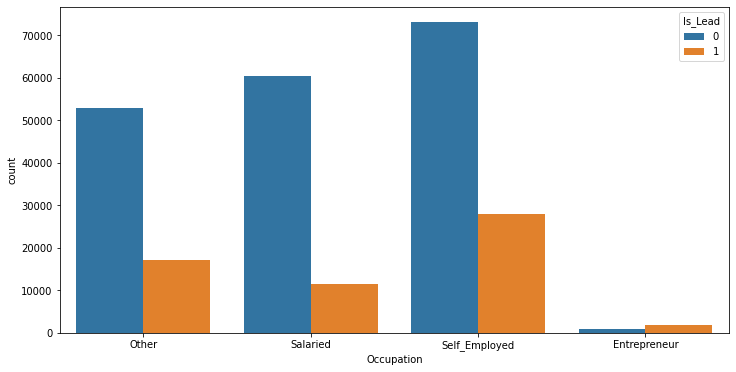

In [ ]:
## We can see that entrepreneur are more likely to be lead followed by self-employed people
plt_diag(df_train,'Occupation','Is_Lead')

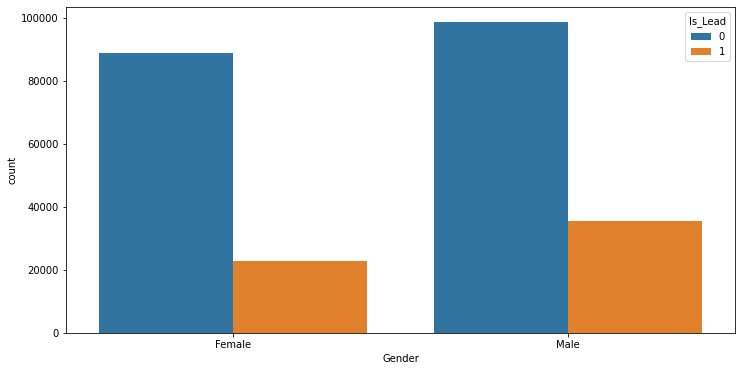

In [ ]:
## Proportion wise there is not much difference between leads across gender.
plt_diag (df_train,'Gender','Is_Lead')

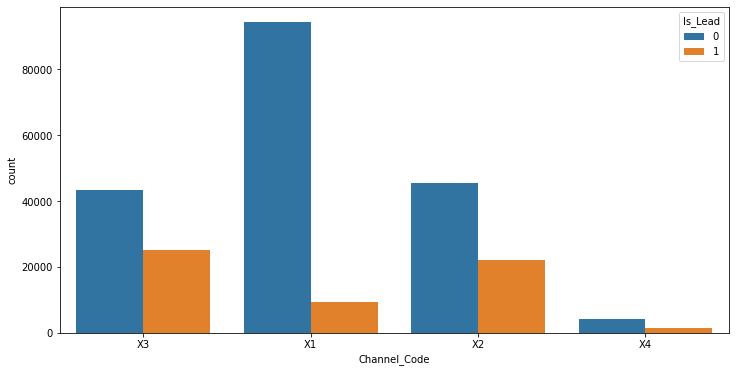

In [ ]:
###Channel code X3 and X2 are effective channels to reach out to customers with most lead 
plt_diag (df_train,'Channel_Code','Is_Lead')

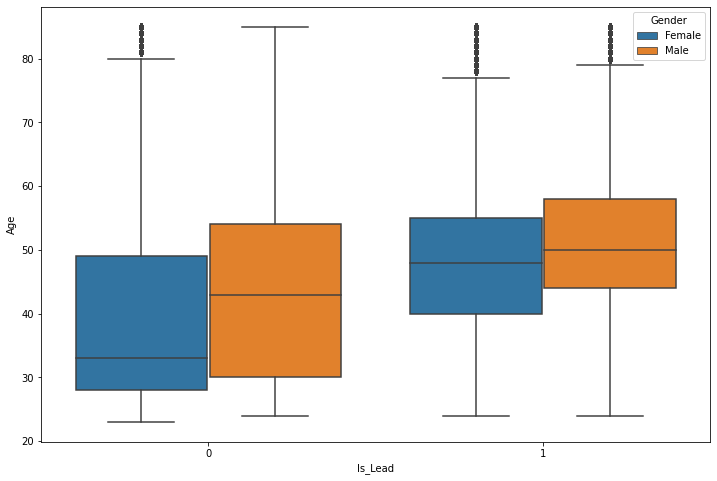

In [ ]:
### Box plot to find out the spread of Age across genders for leads and non leads
plt.figure(figsize = (12,8))
sns.boxplot(data = df_copy, x = 'Is_Lead',y = 'Age', hue = 'Gender')


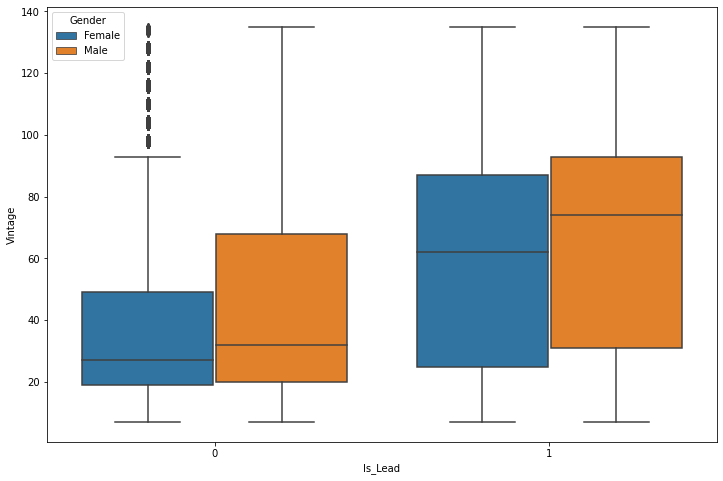

In [ ]:
### It is evident from the plot below that both male and female who are associated with banks for long time are more likely to be lead
plt.figure(figsize = (12,8))
sns.boxplot(data = df_copy, x = 'Is_Lead',y = 'Vintage', hue = 'Gender')

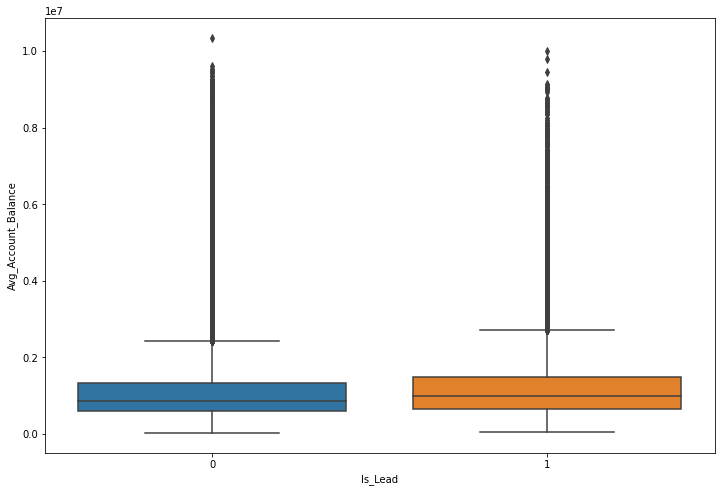

In [ ]:

plt.figure(figsize = (12,8))
sns.boxplot(data = df_copy, x = 'Is_Lead',y = 'Avg_Account_Balance')

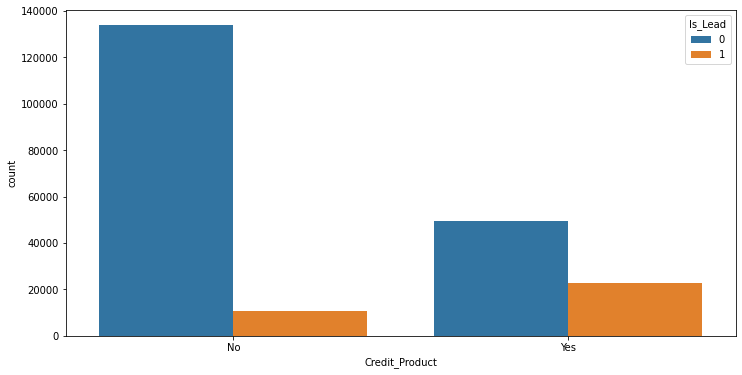

In [ ]:
## It is important to note here that customers with credit product are more likely to be lead. 
## One thing to be noted here that around 29k values are null in credit_product
plt_diag(df_train,'Credit_Product','Is_Lead')

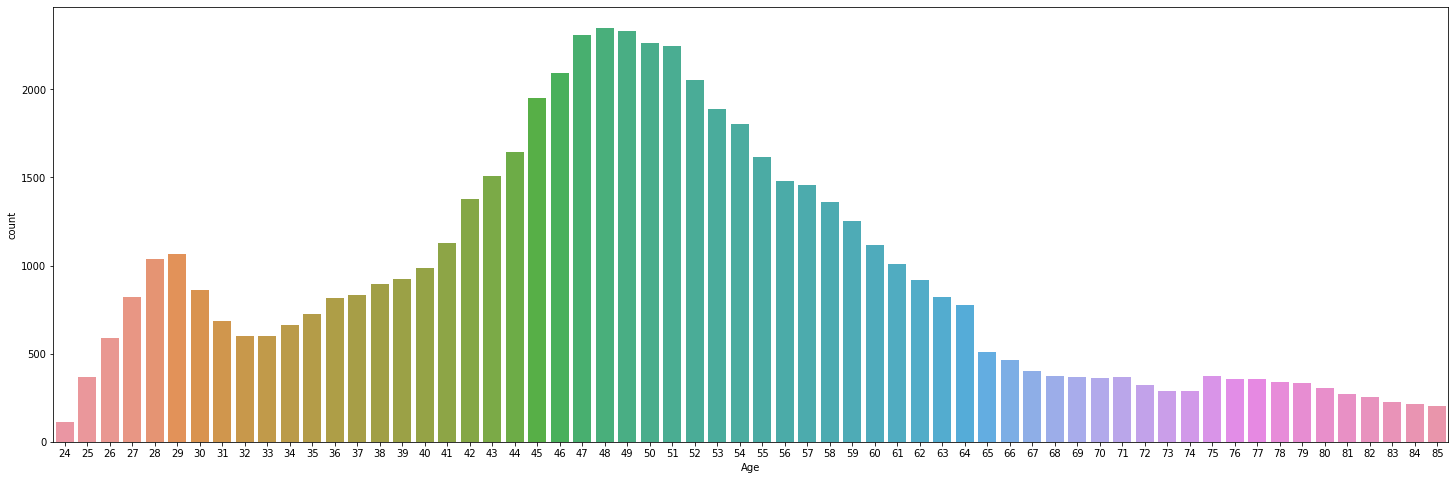

In [ ]:
plt.figure(figsize = (25,8))
df_t_l = df_train[df_train['Is_Lead']==1]
sns.countplot(data = df_t_l,x = 'Age')

In [ ]:
# plt.figure(figsize = (25,8))
# df_t_l = df_train[df_train['Is_Lead']==1]
# sns.countplot(data = df_t_l,x = 'Avg_Account_Balance')

Error in callback <function flush_figures at 0x7f4c8b910440> (for post_execute):


KeyboardInterrupt: ignored

Text(0.5, 1.0, 'Count of Male Lead Customers across Tenure with Bank ')

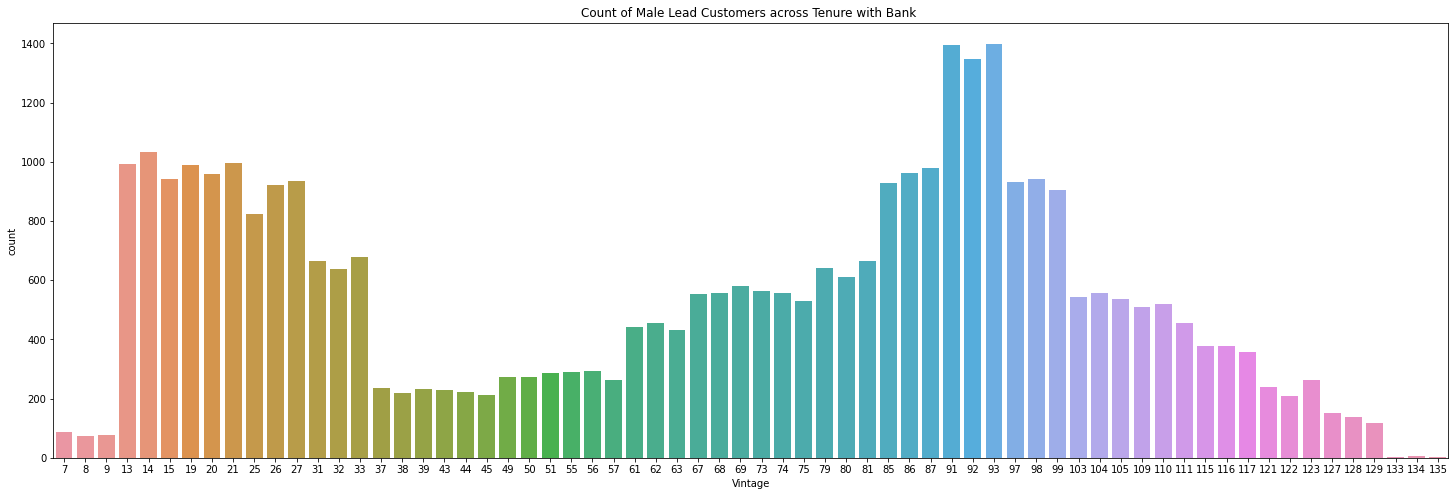

In [ ]:
plt.figure(figsize = (25,8))
df_t_l = df_train[(df_train['Is_Lead']==1) & (df_train['Gender']=='Male')]
sns.countplot(data = df_t_l,x = 'Vintage')
plt.title("Count of Male Lead Customers across Tenure with Bank ")

Feature Engineering

In [ ]:
### Creating a new column where we will fill 1 if credit product is null and 0 when credit product value is 0 or 1 
df_copy['Product'] = np.where(df_copy['Credit_Product'].isnull(),1,0)
df_copy['Credit_Product'].fillna('NULL',inplace  = True)

df_copy_test['Product'] = np.where(df_copy_test['Credit_Product'].isnull(),1,0)
df_copy_test['Credit_Product'].fillna('NULL',inplace  = True)

In [ ]:
df_num = df_copy.select_dtypes(include = 'int')
df_num_test = df_copy_test.select_dtypes(include = 'int')

df_obj = df_copy.select_dtypes(include = 'object')
df_obj_test = df_copy_test.select_dtypes(include = 'object')

In [ ]:
## We will use robust scaler to scale the numerical values in the training and test data
from sklearn.preprocessing import StandardScaler
rs = StandardScaler()

In [ ]:
## Creating a list of columns. This will be used for scaling and creating dummies
cols_num = ['Age','Vintage','Avg_Account_Balance']
cols_obj = ['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active']

In [ ]:
## Scaling of numerical columns is performed for both train and test dataset
df_num_transformed = pd.DataFrame(rs.fit_transform(df_num[cols_num]),columns = cols_num)
df_num_test_transformed = pd.DataFrame(rs.fit_transform(df_num_test[cols_num]),columns = cols_num)

In [ ]:
## Dummy variables are created for categorical attributes
df_obj_transformed = pd.get_dummies(df_obj[cols_obj])
df_obj_test_transformed = pd.get_dummies(df_obj_test[cols_obj])

In [ ]:
##Concatinating the dataframe to produce a final dataframe

final_df_1 = pd.concat([df_num_transformed,df_obj_transformed], axis = 1)
final_df_1_test = pd.concat([df_num_test_transformed,df_obj_test_transformed], axis = 1)

final_df_2 = pd.concat([final_df_1,df_copy['Product']],axis = 1)
final_df_2_test = pd.concat([final_df_1_test,df_copy_test['Product']],axis = 1)

In [ ]:
### Split data in train and test data

from sklearn.model_selection import train_test_split
y = df_copy['Is_Lead'].values
X = final_df_2.values
X1 = final_df_2_test.values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state = 50)

In [ ]:
## Importing metrics for Logistic Regression

from sklearn.metrics import roc_auc_score,confusion_matrix,plot_precision_recall_curve,plot_roc_curve,precision_score, recall_score, f1_score,classification_report
from sklearn.linear_model import LogisticRegression

In [ ]:
## Fitting data in logistic regression classifier

lr = LogisticRegression(class_weight = 'balanced',penalty = 'l2',solver = 'lbfgs')
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("ROC AUC Score of the LR classifier is: ",roc_auc_score(y_test, lr_pred))
print("Precision of the LR classifier is: ",precision_score(y_test, lr_pred))
print("Recall of the LR classifier is: ",recall_score(y_test, lr_pred))
print("F1 score the LR classifier is: ",f1_score(y_test, lr_pred))

print("\n Classification report for the logistic regression is as below \n",classification_report(y_test,lr_pred))
print("\n Confusion matrix for logistic regression classifier is as below \n",confusion_matrix(y_test,lr_pred))


ROC AUC Score of the LR classifier is:  0.7875370207878114
Precision of the LR classifier is:  0.566434157683365
Recall of the LR classifier is:  0.7580763790664781
F1 score the LR classifier is:  0.648390999274135

 Classification report for the logistic regression is as below 
               precision    recall  f1-score   support

           0       0.91      0.82      0.86     56043
           1       0.57      0.76      0.65     17675

    accuracy                           0.80     73718
   macro avg       0.74      0.79      0.76     73718
weighted avg       0.83      0.80      0.81     73718


 Confusion matrix for logistic regression classifier is as below 
 [[45787 10256]
 [ 4276 13399]]


In [ ]:
## Below section predict the probability on test dataset and add the predicted probability in the test dataset
lr_prediction = lr.predict(X1)
final_df_2_test['Is_Lead'] = lr.predict_proba(X1)[:,-1]
data_sub = pd.concat([final_df_2_test,df_copy_test['ID']], axis=1)

In [ ]:
from google.colab import files
data_sub[['ID','Is_Lead']].to_csv('submission.csv', index = False)
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>